In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

csvpath = "Resources/sfpd_incidents_2016.csv"
sfpd_df = pd.read_csv(csvpath)

In [14]:
# The data frame with all unwanted categories removed
sf_clean = sfpd_df[~sfpd_df['Category'].isin(['NON-CRIMINAL', 'OTHER OFFENSES','SECONDARY CODES','WARRANTS','SUICIDE','BRIBERY','EXTORTION','EXTORTION','FAMILY OFFENSES','LOITERING','SEX OFFENSES', 'NON FORCIBLE','BAD CHECKS','GAMBLING','PORNOGRAPHY/OBSCENE MAT','TREA'])]
sf_clean_df = sf_clean.dropna(how='any')
sf_crime = sf_clean_df.drop(['PdId'], axis = 1)
sf_crime

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)"
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)"
5,160002869,ASSAULT,BATTERY,Friday,01/01/2016 12:00:00 AM,21:35,NORTHERN,NONE,1700 Block of BUSH ST,-122.426077,37.788019,"(37.788018555829, -122.426077177375)"
9,160003641,MISSING PERSON,FOUND PERSON,Friday,01/01/2016 12:00:00 AM,10:06,BAYVIEW,NONE,100 Block of CAMERON WY,-122.387182,37.720967,"(37.7209669615499, -122.387181635995)"
10,160086863,LARCENY/THEFT,ATTEMPTED THEFT FROM LOCKED VEHICLE,Friday,01/29/2016 12:00:00 AM,22:30,TARAVAL,NONE,1200 Block of 19TH AV,-122.477377,37.764478,"(37.7644781578695, -122.477376524003)"
...,...,...,...,...,...,...,...,...,...,...,...,...
150492,160823994,ASSAULT,BATTERY,Sunday,10/09/2016 12:00:00 AM,21:15,MISSION,NONE,18TH ST / MISSION ST,-122.419360,37.761836,"(37.7618358012376, -122.419360352761)"
150493,160858327,ASSAULT,BATTERY,Friday,10/21/2016 12:00:00 AM,13:30,MISSION,NONE,3400 Block of 18TH ST,-122.419749,37.761867,"(37.7618672648972, -122.419748993977)"
150495,161061000,ASSAULT,BATTERY,Friday,12/30/2016 12:00:00 AM,21:01,PARK,NONE,OAK ST / STANYAN ST,-122.453982,37.771428,"(37.7714278595913, -122.453981622365)"
150497,176000758,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,12/29/2016 12:00:00 AM,20:00,CENTRAL,NONE,PINE ST / TAYLOR ST,-122.412269,37.790673,"(37.7906727649886, -122.41226909106)"


In [15]:
# Cleaning the 'Time' column
time_min = pd.to_datetime(sf_crime["Time"])
time_clean = time_min.dt.hour
sf_crime['Hour'] = time_clean
sf_crime

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,Hour
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",11
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",11
5,160002869,ASSAULT,BATTERY,Friday,01/01/2016 12:00:00 AM,21:35,NORTHERN,NONE,1700 Block of BUSH ST,-122.426077,37.788019,"(37.788018555829, -122.426077177375)",21
9,160003641,MISSING PERSON,FOUND PERSON,Friday,01/01/2016 12:00:00 AM,10:06,BAYVIEW,NONE,100 Block of CAMERON WY,-122.387182,37.720967,"(37.7209669615499, -122.387181635995)",10
10,160086863,LARCENY/THEFT,ATTEMPTED THEFT FROM LOCKED VEHICLE,Friday,01/29/2016 12:00:00 AM,22:30,TARAVAL,NONE,1200 Block of 19TH AV,-122.477377,37.764478,"(37.7644781578695, -122.477376524003)",22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150492,160823994,ASSAULT,BATTERY,Sunday,10/09/2016 12:00:00 AM,21:15,MISSION,NONE,18TH ST / MISSION ST,-122.419360,37.761836,"(37.7618358012376, -122.419360352761)",21
150493,160858327,ASSAULT,BATTERY,Friday,10/21/2016 12:00:00 AM,13:30,MISSION,NONE,3400 Block of 18TH ST,-122.419749,37.761867,"(37.7618672648972, -122.419748993977)",13
150495,161061000,ASSAULT,BATTERY,Friday,12/30/2016 12:00:00 AM,21:01,PARK,NONE,OAK ST / STANYAN ST,-122.453982,37.771428,"(37.7714278595913, -122.453981622365)",21
150497,176000758,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,12/29/2016 12:00:00 AM,20:00,CENTRAL,NONE,PINE ST / TAYLOR ST,-122.412269,37.790673,"(37.7906727649886, -122.41226909106)",20


In [16]:
# Bin code 00:00-08:00, 09:00-17:00, 18:00-24:00

In [17]:
# Creating the bins for the 'Hours'
bins = [0,8,17,24]
time_of_day = ["Morning", "Middle", "Night"]

In [18]:
# Applying the bins to 'Hours'
pd.cut(sf_crime["Hour"], bins, labels=time_of_day).head()

0     Middle
1     Middle
5      Night
9     Middle
10     Night
Name: Hour, dtype: category
Categories (3, object): [Morning < Middle < Night]

In [19]:
# Adding the assigning the bins to 'Time of Day' and adding it to the dataframe
sf_crime["Time of Day"] = pd.cut(sf_crime["Hour"], bins, labels=time_of_day)
sf_crime.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,Hour,Time of Day
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",11,Middle
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",11,Middle
5,160002869,ASSAULT,BATTERY,Friday,01/01/2016 12:00:00 AM,21:35,NORTHERN,NONE,1700 Block of BUSH ST,-122.426077,37.788019,"(37.788018555829, -122.426077177375)",21,Night
9,160003641,MISSING PERSON,FOUND PERSON,Friday,01/01/2016 12:00:00 AM,10:06,BAYVIEW,NONE,100 Block of CAMERON WY,-122.387182,37.720967,"(37.7209669615499, -122.387181635995)",10,Middle
10,160086863,LARCENY/THEFT,ATTEMPTED THEFT FROM LOCKED VEHICLE,Friday,01/29/2016 12:00:00 AM,22:30,TARAVAL,NONE,1200 Block of 19TH AV,-122.477377,37.764478,"(37.7644781578695, -122.477376524003)",22,Night


In [20]:
# Bar graph showing crime types across the city 

In [21]:
morning_crime = sf_crime.loc[sf_crime["Time of Day"]== "Morning"]
middle_crime = sf_crime.loc[sf_crime["Time of Day"]== "Middle"]
night_crime = sf_crime.loc[sf_crime["Time of Day"]== "Night"]

In [31]:
morning_crime["Category"].value_counts()

LARCENY/THEFT                  4794
ASSAULT                        2832
VANDALISM                      1733
BURGLARY                       1510
SUSPICIOUS OCC                 1122
VEHICLE THEFT                   976
MISSING PERSON                  813
ROBBERY                         799
DRUG/NARCOTIC                   749
TRESPASS                        647
DISORDERLY CONDUCT              367
FRAUD                           317
WEAPON LAWS                     296
SEX OFFENSES, FORCIBLE          248
STOLEN PROPERTY                 191
RECOVERED VEHICLE               166
ARSON                           130
DRUNKENNESS                     118
DRIVING UNDER THE INFLUENCE     104
FORGERY/COUNTERFEITING           63
KIDNAPPING                       57
PROSTITUTION                     36
RUNAWAY                          26
LIQUOR LAWS                      21
EMBEZZLEMENT                     14
SEX OFFENSES, NON FORCIBLE        2
Name: Category, dtype: int64

In [32]:
middle_crime["Category"].value_counts()

LARCENY/THEFT                  18967
ASSAULT                         5851
VANDALISM                       3148
SUSPICIOUS OCC                  2764
VEHICLE THEFT                   2331
MISSING PERSON                  2325
DRUG/NARCOTIC                   2293
BURGLARY                        2202
FRAUD                           1422
ROBBERY                         1136
TRESPASS                         777
WEAPON LAWS                      733
STOLEN PROPERTY                  394
RECOVERED VEHICLE                390
FORGERY/COUNTERFEITING           370
SEX OFFENSES, FORCIBLE           332
PROSTITUTION                     315
DISORDERLY CONDUCT               187
DRUNKENNESS                      157
KIDNAPPING                       108
EMBEZZLEMENT                      95
LIQUOR LAWS                       84
DRIVING UNDER THE INFLUENCE       82
ARSON                             74
RUNAWAY                           73
SEX OFFENSES, NON FORCIBLE        23
Name: Category, dtype: int64

In [33]:
night_crime["Category"].value_counts()

LARCENY/THEFT                  15256
ASSAULT                         4234
VANDALISM                       3351
VEHICLE THEFT                   2890
BURGLARY                        1856
SUSPICIOUS OCC                  1554
ROBBERY                         1197
DRUG/NARCOTIC                   1070
MISSING PERSON                  1059
FRAUD                            568
WEAPON LAWS                      542
TRESPASS                         339
STOLEN PROPERTY                  265
SEX OFFENSES, FORCIBLE           263
PROSTITUTION                     255
DRUNKENNESS                      157
DRIVING UNDER THE INFLUENCE      151
RECOVERED VEHICLE                148
FORGERY/COUNTERFEITING            91
DISORDERLY CONDUCT                82
KIDNAPPING                        80
ARSON                             67
LIQUOR LAWS                       49
RUNAWAY                           38
EMBEZZLEMENT                      29
SEX OFFENSES, NON FORCIBLE        10
Name: Category, dtype: int64

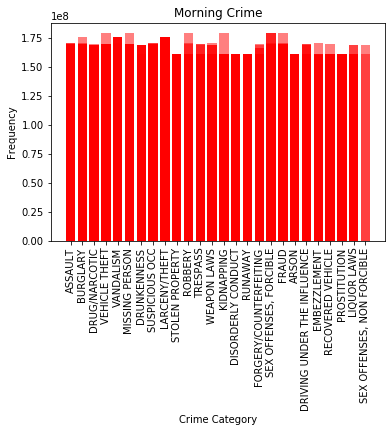

In [30]:
# Morning
x_axis = morning_crime["Category"]
crime_count = morning_crime["IncidntNum"]
plt.bar(x_axis, crime_count, color='r', alpha=.5, align="center")
plt.xticks(rotation = "vertical")
plt.title("Morning Crime")
plt.xlabel("Crime Category")
plt.ylabel("Frequency")
plt.show()

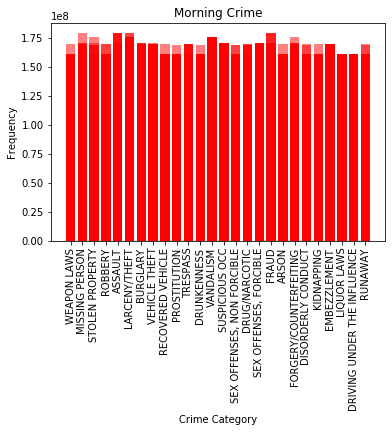

In [36]:
# Middle
x_axis = middle_crime["Category"]
crime_count = middle_crime["IncidntNum"]
plt.bar(x_axis, crime_count, color='r', alpha=.5, align="center")
plt.xticks(rotation = "vertical")
plt.title("Morning Crime")
plt.xlabel("Crime Category")
plt.ylabel("Frequency")
plt.show()

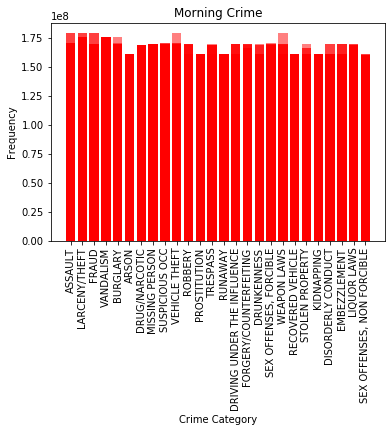

In [35]:
# Night
x_axis = night_crime["Category"]
crime_count = night_crime["IncidntNum"]
plt.bar(x_axis, crime_count, color='r', alpha=.5, align="center")
plt.xticks(rotation = "vertical")
plt.title("Morning Crime")
plt.xlabel("Crime Category")
plt.ylabel("Frequency")
plt.show()